<a href="https://www.kaggle.com/lalina/data-challenge-day-1-of-5?scriptVersionId=85622344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/80-cereals/cereal.csv


### Welcome to my first challenge on kaggle!
In this challenge I would like to do some simple exploration of a cereal data then do a t-test to see if there is any statistically difference in the contain of a certain nutrition value. 

In [2]:
#Import all the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import probplot
import pylab

In [3]:
# Read the data
df = pd.read_csv('../input/80-cereals/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
#Find some info using the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
# Summarize the data
df.describe(include = 'all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


* The data consist of three categorical variables : name, mfr, type
* We also have 13 numerical variables
* and it doesn't contain any null value.

array([[<AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'protein'}>,
        <AxesSubplot:title={'center':'fat'}>,
        <AxesSubplot:title={'center':'sodium'}>],
       [<AxesSubplot:title={'center':'fiber'}>,
        <AxesSubplot:title={'center':'carbo'}>,
        <AxesSubplot:title={'center':'sugars'}>,
        <AxesSubplot:title={'center':'potass'}>],
       [<AxesSubplot:title={'center':'vitamins'}>,
        <AxesSubplot:title={'center':'shelf'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'cups'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

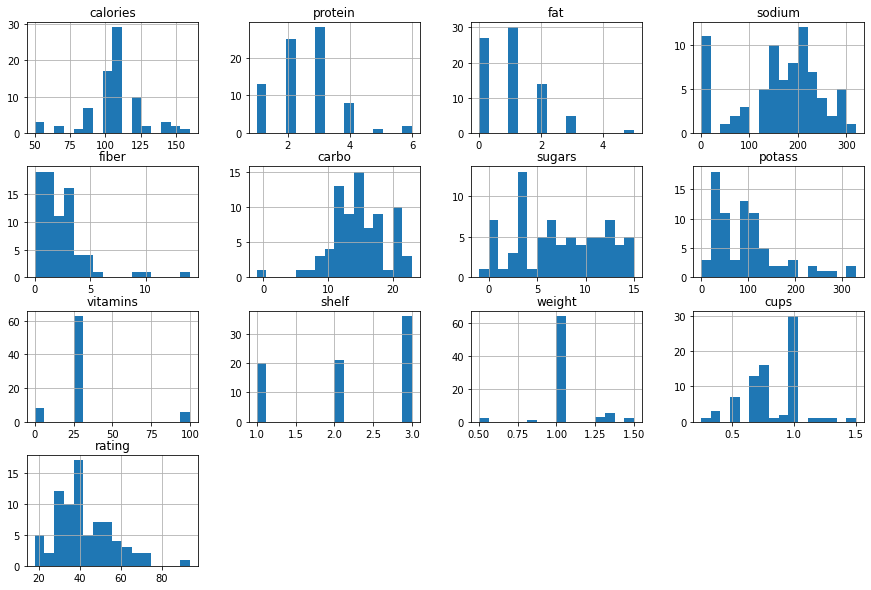

In [6]:
#Let's plot all the histogram from this dataset
df.hist(bins=16, figsize=(15, 10), layout=(4, 4))

From the shape of the data, I choose to test **calories**, **protein**, **sodium**, and **carbo**.

Check the distribution using qqplot.
If the variable is normally distributed, the points will be spread close to the line

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

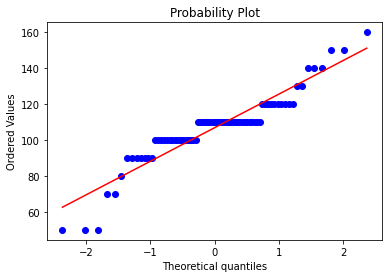

In [7]:
#Calories
probplot(df["calories"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

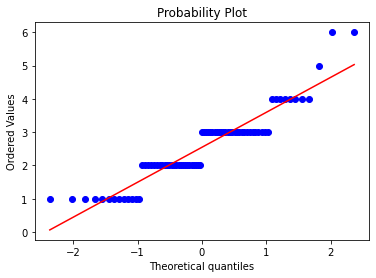

In [8]:
#For protein
probplot(df["protein"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

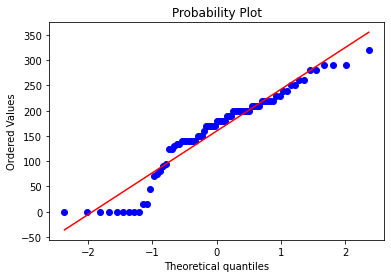

In [9]:
#For sodium
probplot(df["sodium"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

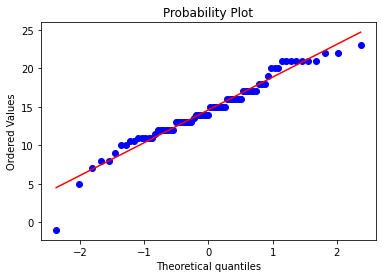

In [10]:
#For carbo
probplot(df["carbo"], dist="norm", plot=pylab)

Looking at the probability plot, variable carbo and sodium are most likely suitable for t-test.

In [11]:
#Let's start from sodium

hot_sodium = df.query('type == "H"')['sodium']
cold_sodium = df.query('type == "C"')['sodium']

#Compare using t-test

print(ttest_ind(hot_sodium, cold_sodium, equal_var=False))

Ttest_indResult(statistic=-4.896357618932593, pvalue=0.02411482081945822)


* The variables doesn't seem to have equal variance so I use equal_var = False
* p-value = 0.024 less than significant p-value 0.05 so we reject the null hypothesis
* reject the null (hypotheses that the two has no different value)
* hot and cold cereals have significantly difference in the sodium content

In [12]:
print("Mean sodium for hot cereals: ", hot_sodium.mean())
print("Mean sodium for cold cereals ", cold_sodium.mean())

Mean sodium for hot cereals:  26.666666666666668
Mean sodium for cold cereals  165.06756756756758


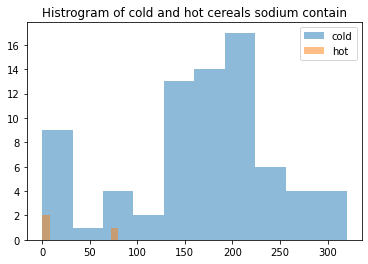

In [13]:
plt.hist(cold_sodium, alpha = 0.5, label = "cold")
plt.hist(hot_sodium, alpha = 0.5, label = "hot")
plt.title("Histrogram of cold and hot cereals sodium contain")
plt.legend()
plt.show()

equal_varbool, optional
If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

In [14]:
#Let's start from carbo
hot_carbo = df.query('type == "H"')['carbo']
cold_carbo = df.query('type == "C"')['carbo']

#Compare using t-test

print(ttest_ind(hot_carbo, cold_carbo, equal_var=False))

Ttest_indResult(statistic=-0.40498035643613134, pvalue=0.7243836786911502)


* p-value = 0.72 a lot more than significant p-value 0.05 so we can'treject the null hypothesis
* hot and cold cereals have not much difference in carbo content

In [15]:
# What about the mean between carbo nutrition of hot cereal and cold cereal
print("Mean carbo for hot cereals: ", hot_carbo.mean())
print("Mean carbo for cold cereals ", cold_carbo.mean())

Mean carbo for hot cereals:  12.0
Mean carbo for cold cereals  14.702702702702704


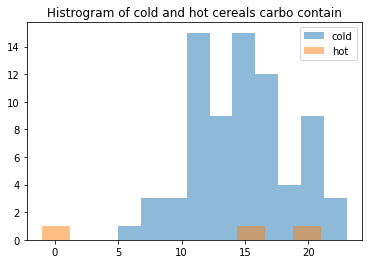

In [16]:
#Plot the histogram of carbo
plt.hist(cold_carbo, alpha = 0.5, label = "cold")
plt.hist(hot_carbo, alpha = 0.5, label = "hot")
plt.title("Histrogram of cold and hot cereals carbo contain")
plt.legend()
plt.show()

#### Conclusion
There is a significant difference of sodium contain between hot and cold cereals, however they contain pretty much similar carbohydrate content. 

To reduce the variance between hot and cold cereals, we need more nutrition data of hot cereals.

This challenge is part of data challenge for beginner [Click here for more](https://www.kaggle.com/rtatman/the-5-day-data-challenge/notebook). 

Thank you for reading. I will appreciate inputs and comments :D